In [1]:
import sklearn
import time
from PIL import Image
import numpy as np
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from matplotlib.colors import hsv_to_rgb

In [2]:
N_COLORS = 10

In [3]:
sunset = Image.open('./data/training/sunset_1.jpg')

In [4]:
help(sunset.convert)

Help on method convert in module PIL.Image:

convert(mode=None, matrix=None, dither=None, palette=0, colors=256) method of PIL.JpegImagePlugin.JpegImageFile instance
    Returns a converted copy of this image. For the "P" mode, this
    method translates pixels through the palette.  If mode is
    omitted, a mode is chosen so that all information in the image
    and the palette can be represented without a palette.
    
    The current version supports all possible conversions between
    "L", "RGB" and "CMYK." The **matrix** argument only supports "L"
    and "RGB".
    
    When translating a color image to greyscale (mode "L"),
    the library uses the ITU-R 601-2 luma transform::
    
        L = R * 299/1000 + G * 587/1000 + B * 114/1000
    
    The default method of converting a greyscale ("L") or "RGB"
    image into a bilevel (mode "1") image uses Floyd-Steinberg
    dither to approximate the original image luminosity levels. If
    dither is NONE, all values larger than 128 

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1600x1200 at 0x122571C50>
resized <PIL.Image.Image image mode=HSV size=300x225 at 0x10FA90C50>
(225, 300, 3)


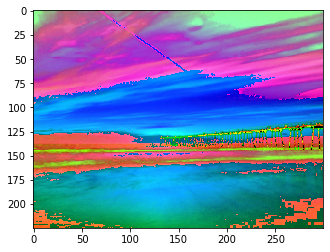

In [5]:

print(sunset)
sunset.thumbnail((300, 400))
sunset = sunset.convert('HSV')
print(f'resized {sunset}')
image = np.array(sunset)
print(image.shape)
plt.imshow(np.array(image))

In [6]:
print(image.shape)
samples = image.reshape(-1, 3)
print(samples[0])

(225, 300, 3)
[142 255 145]


In [7]:
model_a = BayesianGaussianMixture(N_COLORS, max_iter=int(1e7))
model_b = GaussianMixture(N_COLORS, max_iter=int(1e7))
models = [model_a, model_b]
trained_models = []

In [8]:
for index, model in enumerate(models):
    print(f'training #{index} as model={model}')
    trained_model = model.fit(samples)
    trained_models.append(trained_model)

training #0 as model=BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=10000000, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=1,
                        random_state=None, reg_covar=1e-06, tol=0.001,
                        verbose=0, verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')
training #1 as model=GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=10000000,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)


In [9]:
def get_palette(color_values):
    palette = np.zeros((50, 50 * len(color_values), 3))
    for index, color in enumerate(color_values):
        palette[:,index * 50: (index + 1) * 50] = color
    return palette

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.78039216 0.54780469 0.6080038 ]


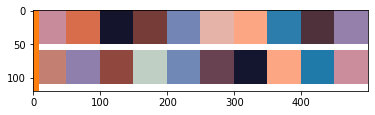

In [10]:
palettes = list()
for model in trained_models:
    tmp_outputs = model.predict(samples)
    plt.hist(tmp_outputs)
    tmp_grouped = pd.DataFrame(samples).groupby(tmp_outputs)
    tmp_wat = get_palette(np.array(tmp_grouped.mean())).astype(np.int)
    color_swap = hsv_to_rgb(tmp_wat/255)
    palettes.append(color_swap.astype(np.float))
    palettes.append(np.full((len(tmp_grouped), 50 * len(tmp_grouped), 3), 255))
print(palettes[0][0][0])
# plt.rgb()
plt.imshow(np.concatenate(palettes, axis=0))

In [11]:
palettes[0]
help(hsv_to_rgb)

Help on function hsv_to_rgb in module matplotlib.colors:

hsv_to_rgb(hsv)
    Convert hsv values to rgb.
    
    Parameters
    ----------
    hsv : (..., 3) array-like
       All values assumed to be in range [0, 1]
    
    Returns
    -------
    rgb : (..., 3) ndarray
       Colors converted to RGB values in range [0, 1]



In [12]:
help(plt.hsv)

Help on function hsv in module matplotlib.pyplot:

hsv()
    Set the colormap to "hsv".
    
    This changes the default colormap as well as the colormap of the current
    image if there is one. See ``help(colormaps)`` for more information.



In [13]:
from matplotlib.pyplot import colormaps
help(colormaps)

Help on function colormaps in module matplotlib.pyplot:

colormaps()
    Matplotlib provides a number of colormaps, and others can be added using
    :func:`~matplotlib.cm.register_cmap`.  This function documents the built-in
    colormaps, and will also return a list of all registered colormaps if
    called.
    
    You can set the colormap for an image, pcolor, scatter, etc,
    using a keyword argument::
    
      imshow(X, cmap=cm.hot)
    
    or using the :func:`set_cmap` function::
    
      imshow(X)
      pyplot.set_cmap('hot')
      pyplot.set_cmap('jet')
    
    In interactive mode, :func:`set_cmap` will update the colormap post-hoc,
    allowing you to see which one works best for your data.
    
    All built-in colormaps can be reversed by appending ``_r``: For instance,
    ``gray_r`` is the reverse of ``gray``.
    
    There are several common color schemes used in visualization:
    
    Sequential schemes
      for unipolar data that progresses from low to high
